안녕하세요! 
데이크루 1기로 활동 중인 sssssun입니다!

지난 포스팅에서 Matplotlib으로 pie chart, histogram, bar chart, scatter plot 을 그려보았는데요! 오늘은 Matplotlib 마지막 포스팅으로, box plot과 등고선 그림, 3D 그림을 그려볼 예정입니다.

그리고 지난번에 댓글로 남겨주신 subplot에 대한 내용도 공부하여 작성하셨으니, 부족한 점이나 피드백! 항상 환영합니다><

데이터 분석 고수분들...!!! 입문자가 공부해보면 좋을 다른 파이썬 라이브러리 마구마구 추천해주세요!! 

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')

# 5. Box plot(상자 수염 그래프)

box plot 은 수치형 데이터를 5개의 요약 통계량을 중심으로 표현하는 그래프입니다.

boxplot() 함수를 사용하고, 주요 매개변수로는 sym 과 vert 등이 있습니다.



*   sym : 데이터 이상치를 어떻게 나타낼지 색과 형태를 정할 수 있습니다. '색+모양'의 형태도 지정해줄 수 있습니다.
*   vert : 0으로 설정하면, 가로 방향의 box plot을 그릴 수 있습니다.

앞서 bar plot 을 그릴 때 사용했던, tips data set을 이용하여 그려보겠습니다.

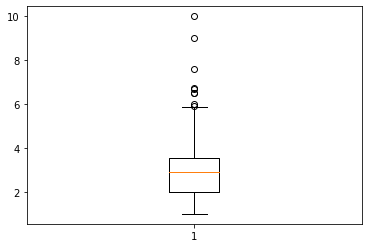

In [3]:
plt.boxplot(tips['tip'])
plt.show()

매개변수를 조정해볼까요?


그래프를 가로방향으로 바꾸어주고, outlier를 빨간색 별로 표현해주겠습니다.

data의 이름이 나타날 수 있게, 눈금에 표시된 1을 tip이라는 이름으로 바꾸어주겠습니다.

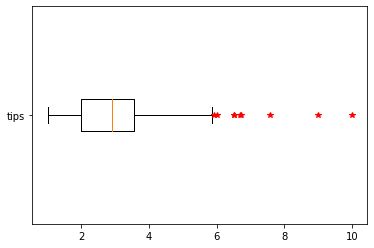

In [4]:
plt.boxplot(tips['tip'], vert=0, sym="r*")
plt.yticks([1], ['tips'])
plt.show()

의도한대로 그래프가 그려지는 것을 확인할 수 있습니다!

이제 2가지 이상의 변수를 하나의 그래프에 그려볼까요?

방법은 간단합니다. data를 넣는 자리에 리스트의 형태로 여러개의 데이터를 넣어주면 됩니다!

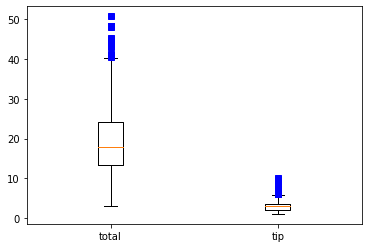

In [4]:
total = tips['total_bill']
tip = tips['tip']


plt.boxplot([total, tip], sym="bs")  #outlier를 파란 네모로 표현해주었습니다.
plt.xticks([1,2], ['total', 'tip'])
plt.show()

전체 지불 금액과 팁 금액 boxplot을 한 그림에 그려본 것입니다.

# 6. Contour plot(등고선 그림)

Contour plot은 3차원 자료를 시각화하는 방법 중 하나입니다.

contour() 함수나 contourf() 함수를 이용하여 그릴 수 있습니다.



*   contour() : 등고선이 선으로 표현된 형태
*   contourf() : 등고선 그림이 색으로 채워진 형태

In [6]:
def func(x, y) :
  z = np.sqrt(x**2 + y**2)
  return np.sin(z) / z

num = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(num, num)
Z = func(X, Y)

Z

array([[0.07070981, 0.06934482, 0.06240344, ..., 0.06240344, 0.06934482,
        0.07070981],
       [0.06934482, 0.06197452, 0.04926032, ..., 0.04926032, 0.06197452,
        0.06934482],
       [0.06240344, 0.04926032, 0.03148767, ..., 0.03148767, 0.04926032,
        0.06240344],
       ...,
       [0.06240344, 0.04926032, 0.03148767, ..., 0.03148767, 0.04926032,
        0.06240344],
       [0.06934482, 0.06197452, 0.04926032, ..., 0.04926032, 0.06197452,
        0.06934482],
       [0.07070981, 0.06934482, 0.06240344, ..., 0.06240344, 0.06934482,
        0.07070981]])

3차원 데이터가 필요하기 때문에, 원을 활용해 x,y,z 값을 만들어주었습니다.

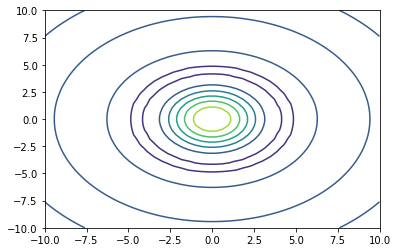

In [7]:
plt.contour(X, Y, Z)
plt.show()

가로축과 세로축은 각각 X, Y 값이고, Z 값은 등고선의 색으로 표현되었음을 알 수 있습니다.

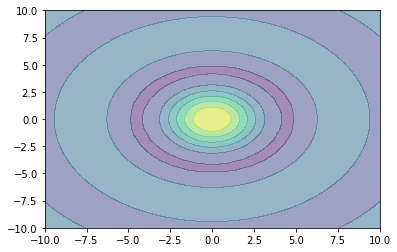

In [8]:
plt.contourf(X, Y, Z, alpha=0.5) #이전의 plot들과 동일하게 투명도를 나타냅니다!
plt.show()

contour()와 동일하게, 가로축과 세로축은 각각 X, Y 값이지만, Z 값은 등고선에 채워진 색으로 표현되었음을 알 수 있습니다.

# 7. 3D surface plot

이번에는 앞서 등고선으로 표현했던 data를 3차원 그림으로 그려보겠습니다.


3차원의 그림을 그리기 위해, mpl_toolkits.mplot3d로부터 축이 3개인 3D로 바꿔주는 Axes3D를 불러오겠습니다.


In [9]:
from mpl_toolkits.mplot3d import Axes3D

그리고 figure를 3D로 바꾸어 3차원 그래프를 그릴 수 있도록 합니다.

먼저 plot_surface를 활용하여 3차원 표면도를 그려보겠습니다.

cmap 이라는 매개변수를 사용할 수 있는데, color map을 의미하는 말로, 구글링하면 다양한 코드를 얻으실 수 있습니다. 저는 등고선과 동일한 결과를 확인할 수 있도록 'viridis' 코드를 사용했습니다.

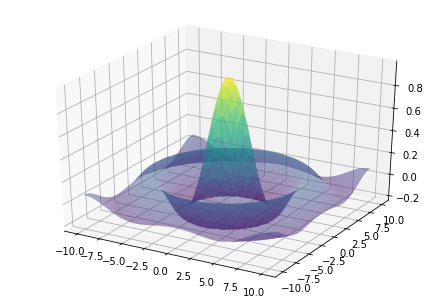

In [10]:
figure = plt.figure()
fig = Axes3D(figure)

fig.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
plt.show()

다음으로는 plot_wireframe() 함수를 활용하여 선으로 표현할 수도 있습니다. 

다른 그래프들과 마찬가지로, color와 alpha를 조절해줄 수 있습니다.

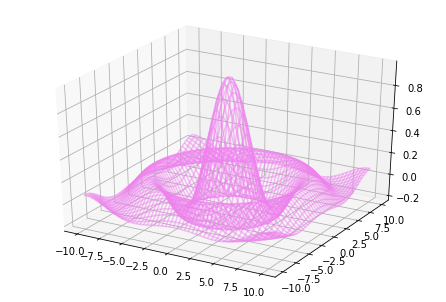

In [11]:
figure = plt.figure()
fig = Axes3D(figure)

fig.plot_wireframe(X, Y, Z, color='violet', alpha=0.5)
plt.show()

# 8. 하위 그래프(sub plot) 추가하기

4분할하여 sub plot 4개를 추가하는 방법 2가지를 보여드리겠습니다.

첫번째 방법은 하나의 figure를 분할하여 각각 다른 그래프로 채워넣는 방법입니다.

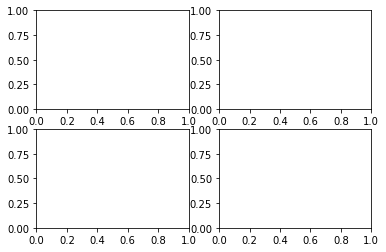

In [12]:
figure = plt.figure()

ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,2)
ax3 = figure.add_subplot(2,2,3)
ax4 = figure.add_subplot(2,2,4)

위와 같이 빈 figure를 설정해주고, 2X2로 나누어 각각의 사분면을 ax1, ax2, ax3, ax4로 지정해주었습니다.

이제 ax1, ax2, ax3, ax4에 개별 그래프를 그려주면 됩니다.

표준 정규 분포를 여러가지 형태의 그래프로 나타내봅시다!

In [13]:
data = np.random.randn(1000)
ax1.plot(data)

In [14]:
ax2.hist(data, bins=30, density=True)

(array([0.00441333, 0.00441333, 0.00882666, 0.01765332, 0.01765332,
        0.03971997, 0.05295996, 0.07502661, 0.11033325, 0.15446655,
        0.26038648, 0.31775977, 0.29569312, 0.38837305, 0.46781299,
        0.40161304, 0.4104397 , 0.29569312, 0.24273316, 0.22949317,
        0.16770654, 0.1323999 , 0.11474658, 0.07061328, 0.07943994,
        0.01765332, 0.01323999, 0.01765332, 0.        , 0.00441333]),
 array([-3.42641022, -3.19982395, -2.97323769, -2.74665142, -2.52006515,
        -2.29347888, -2.06689261, -1.84030634, -1.61372007, -1.38713381,
        -1.16054754, -0.93396127, -0.707375  , -0.48078873, -0.25420246,
        -0.0276162 ,  0.19897007,  0.42555634,  0.65214261,  0.87872888,
         1.10531515,  1.33190142,  1.55848768,  1.78507395,  2.01166022,
         2.23824649,  2.46483276,  2.69141903,  2.9180053 ,  3.14459156,
         3.37117783]),
 <a list of 30 Patch objects>)

In [15]:
ax3.boxplot(data)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8312da4190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8312daa710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8312daaa10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8312e7bf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8312da4c50>,
  <matplotlib.lines.Line2D at 0x7f8312daa1d0>]}

In [16]:
ax4.scatter(np.arange(1000), data)

이렇게 각각의 분할된 figure에 그래프를 그려준 뒤, figure를 출력하면 하나의 figure에 4개의 그래프가 들어간 것을 볼 수 있습니다.

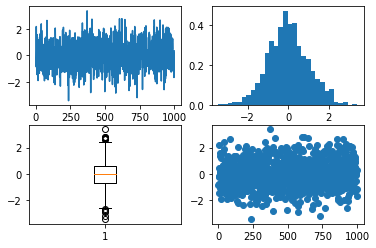

In [17]:
figure

하지만 이러한 방법은 일일히 변수를 설정하고 변수마다 그래프를 그려주어야 하기 때문에 그려야 할 그래프가 많을수록 불편할 수 있습니다.

따라서 subplots()를 활용할 수 있는데, 이 방법은 하나의 빈 그림과 축을 생성하여 한번에 여러개의 그래프를 그릴 수 있습니다.

위와 동일하게 4개의 그림을 그려보겠습니다.

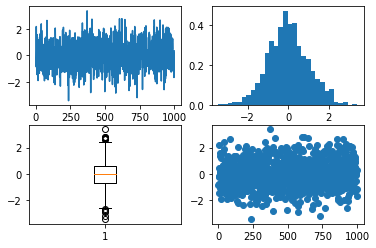

In [18]:
figure, ax = plt.subplots(2,2)  #2X2로 모든 subplot을 담는 하나의 figure를 나눈다는 의미, ax가 낱개의 그래프, 즉 figure의 요소가 됨!

ax[0,0].plot(data)
ax[0,1].hist(data, bins=30, density=True)
ax[1,0].boxplot(data)
ax[1,1].scatter(np.arange(1000), data)

plt.show()

2X2의 열과 행으로 나누어진 ax를 생각하고, 각각의 영역에 그래프를 넣어준다고 생각하면 됩니다! 

위와 같은 결과가 나왔지만, 하나하나 변수를 지정하여 그래프를 그려줄 필요 없기 때문에 비교적 간편하죠?

목적에 맞게 하위 그래프를 추가하는 방법을 선택하면 좋을 것 같습니다.

기초부터 다양한 그래프를 그리는 법까지! Matplotlib의 다양한 사용법을 공부해봤는데요! 미숙하지만, 입문자의 입장에서 Matplotlib를 이해하는데 도움이 되었으면 좋겠습니다^^

읽어주셔서 감사합니다!